####1a) Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. The provided data is already normalized (see description), so there is no need for additional normalization. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression.

In [1]:
import pandas as pd
import numpy as np
from numpy import *

In [2]:
#Read the dataset and make sure to use na_values parameters to track down all the na and missing values.
ccData=pd.read_csv('./communities/communities.csv', na_values=["?"])

In [3]:
ccData.shape

(1994, 100)

In [4]:
#Check any missing or na values
missing_tab=ccData.isnull().sum(0)
missing_tab[missing_tab>0]

OtherPerCap    1
dtype: int64

Based on the above, there is one missing value from on the attribute 'OtherPerCap'

In [5]:
#Fill in the missing value in the 'OtherPerCap' attribute by its MEAN value 
ccData.OtherPerCap.fillna(ccData.OtherPerCap.mean(axis=0), axis=0,inplace=True)

In [7]:
#Double check if there is any more missing values
missing_tab=ccData.isnull().sum(0)
sum(missing_tab[missing_tab>0])

0

In [8]:
#Split the original table into predictor set and target variable
x=ccData.ix[:,0:-1] #Predictor set
y=ccData.ViolentCrimesPerPop # Target/Response variable

In [9]:
#Drop the identifier attribute 'state'
x.drop('state', axis=1,inplace=True)

In [10]:
#Drop the identifier attribute 'communityname'
x.drop('communityname', axis=1,inplace=True)

In [11]:
x.shape

(1994, 97)

In [12]:
y.shape

(1994,)

In [13]:
x1=np.array(x)
y1=np.array(y)
# Should to add a column of ONEs for x0 in order to do multiple regression
x1=np.array([np.concatenate((v,[1])) for v in x1])



In [16]:
from sklearn.cross_validation import train_test_split
#Split the train (80%) and test(20%) dataset
x_train, x_test, y_train, y_test = train_test_split(x1, y1.T, test_size=0.2, random_state=55)

/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [70]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt
%matplotlib inline

ridreg = Ridge()
lasreg = Lasso()

In [27]:
print (ridreg.get_params())

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}


In [104]:
alpha= np.linspace(0.0001,100,500)

In [107]:
x = x_train
y = y_train
clf = ridreg
param_values = alpha 
param_name = 'alpha'
K = 5

def calc_params(x, y, clf, param_values, param_name, K):
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    x=np.array(x)
    y=np.array(y)


    for i , param_value in enumerate(param_values):
        ridreg.set_params(**{param_name:param_value})
        cv = KFold(len(x), K, shuffle=True, random_state=0)

        mae_err_train=np.zeros(K)
        mae_err_test=np.zeros(K)


        for j , (train, test) in enumerate(cv):
            ridreg.fit([x[k] for k in train],y[train])
            train_predict=ridreg.predict(x[train])
            test_predict=ridreg.predict(x[test])
            #Find the Mean Absolute Error for the Regression on Train and Test result
            mae_err_train[j]=mean_absolute_error(y[train],train_predict)
            mae_err_test[j]=mean_absolute_error(y[test],test_predict)
        
        #Take the average of the Mean Absolute Error for every parameter value
        train_scores[i]=np.mean(mae_err_train)
        test_scores[i]=np.mean(mae_err_test)
    
    #Find the Best score for test result
    min_test_scores = test_scores[np.where(test_scores==test_scores.min())]
    #Find the best parameter value
    best_param = param_values[np.where(test_scores == test_scores.min())]
    
    plt.plot(param_values,train_scores, color='blue', label='Train',alpha=0.4)
    plt.plot(param_values,test_scores, color='red', label='Test',alpha=0.4)
    plt.xlabel('Alpha Values')
    plt.ylabel('K Fold Cross Validation MAE Error Accuracy')
    plt.show()
    
    return train_scores , test_scores, min_test_scores, best_param

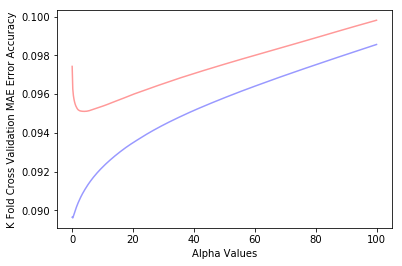

In [109]:
#a,b,c,d = calc_params(x, y, clf, param_values, param_name, K)
a,b,c,d=calc_params(x, y, clf, param_values, param_name, K)
#print('The minimum MAE Value is %0.5f'% (c))
#print('The best parameter alpha is %0.5f'%(d))

In [98]:
ridreg.set_params(alpha=4.00811)
ridreg.fit(x_train,y_train)
test_predict = ridreg.predict(x_test)
MAE=mean_absolute_error(y_test,test_predict)

In [99]:
MAE

0.096027893659798191